Artur Kozubov, Kirill Komarov 54 dataset

## Phase 1

### 1.1 Basic description of the data together with their characteristics 

#### 1.1.A Analysis of data structures such as files, records.

In [1]:
import pandas as pd

In [5]:
file_names = ['connections.csv', 'devices.csv', 'processes.csv', 'profiles.csv']

# Dictionary to hold DataFrames
dataframes = {}

for file in file_names:
    df = pd.read_csv(f'./data/{file}', delimiter='\t')
    dataframes[file] = df
    print(f"\n> Structure of {file}:")
    print(df.info())
    print(df.head())


> Structure of connections.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15155 non-null  object 
 1   imei               15155 non-null  int64  
 2   mwra               15155 non-null  float64
 3   c.katana           15155 non-null  float64
 4   c.dogalize         15155 non-null  float64
 5   c.android.youtube  15155 non-null  float64
 6   c.android.chrome   15155 non-null  float64
 7   c.android.gm       15155 non-null  float64
 8   c.raider           15155 non-null  float64
 9   c.UCMobile.x86     15155 non-null  float64
 10  c.updateassist     15155 non-null  float64
 11  c.UCMobile.intl    15155 non-null  float64
 12  c.android.vending  15155 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB
None
                    ts                 imei  mwra  c.katana  c.dogaliz

>As we can assume technically, data about the location of the device, and data about the person related to this device will be irrelevant for further analysis, as they can't influence the malware. Also about `ts`, `imei`, `ssn`, etc.

#### 1.1.B Analysis of individual attributes: for the selected significant attributes (min 10), analyse their distributions and basic descriptive statistics.

In [14]:
from matplotlib import pyplot as plt

In [11]:
selected_attributes = {
    'connections.csv':
        ['c.katana', 'c.dogalize', 'c.raider', 'c.UCMobile.x86', 'c.updateassist', 'c.android.vending'],

    'devices.csv': [],  # no interested attributes (noone attribute may not be responsible for `mwra`)

    'processes.csv':
        ['p.system', 'p.android.gm', 'p.android.settings', 'p.android.externalstorage', 'p.android.defcontainer',
         'p.process.gapps'],

    'profiles.csv': []  # no interested attributes (noone attribute may not be responsible for `mwra`)
}

In [6]:
import seaborn as sns

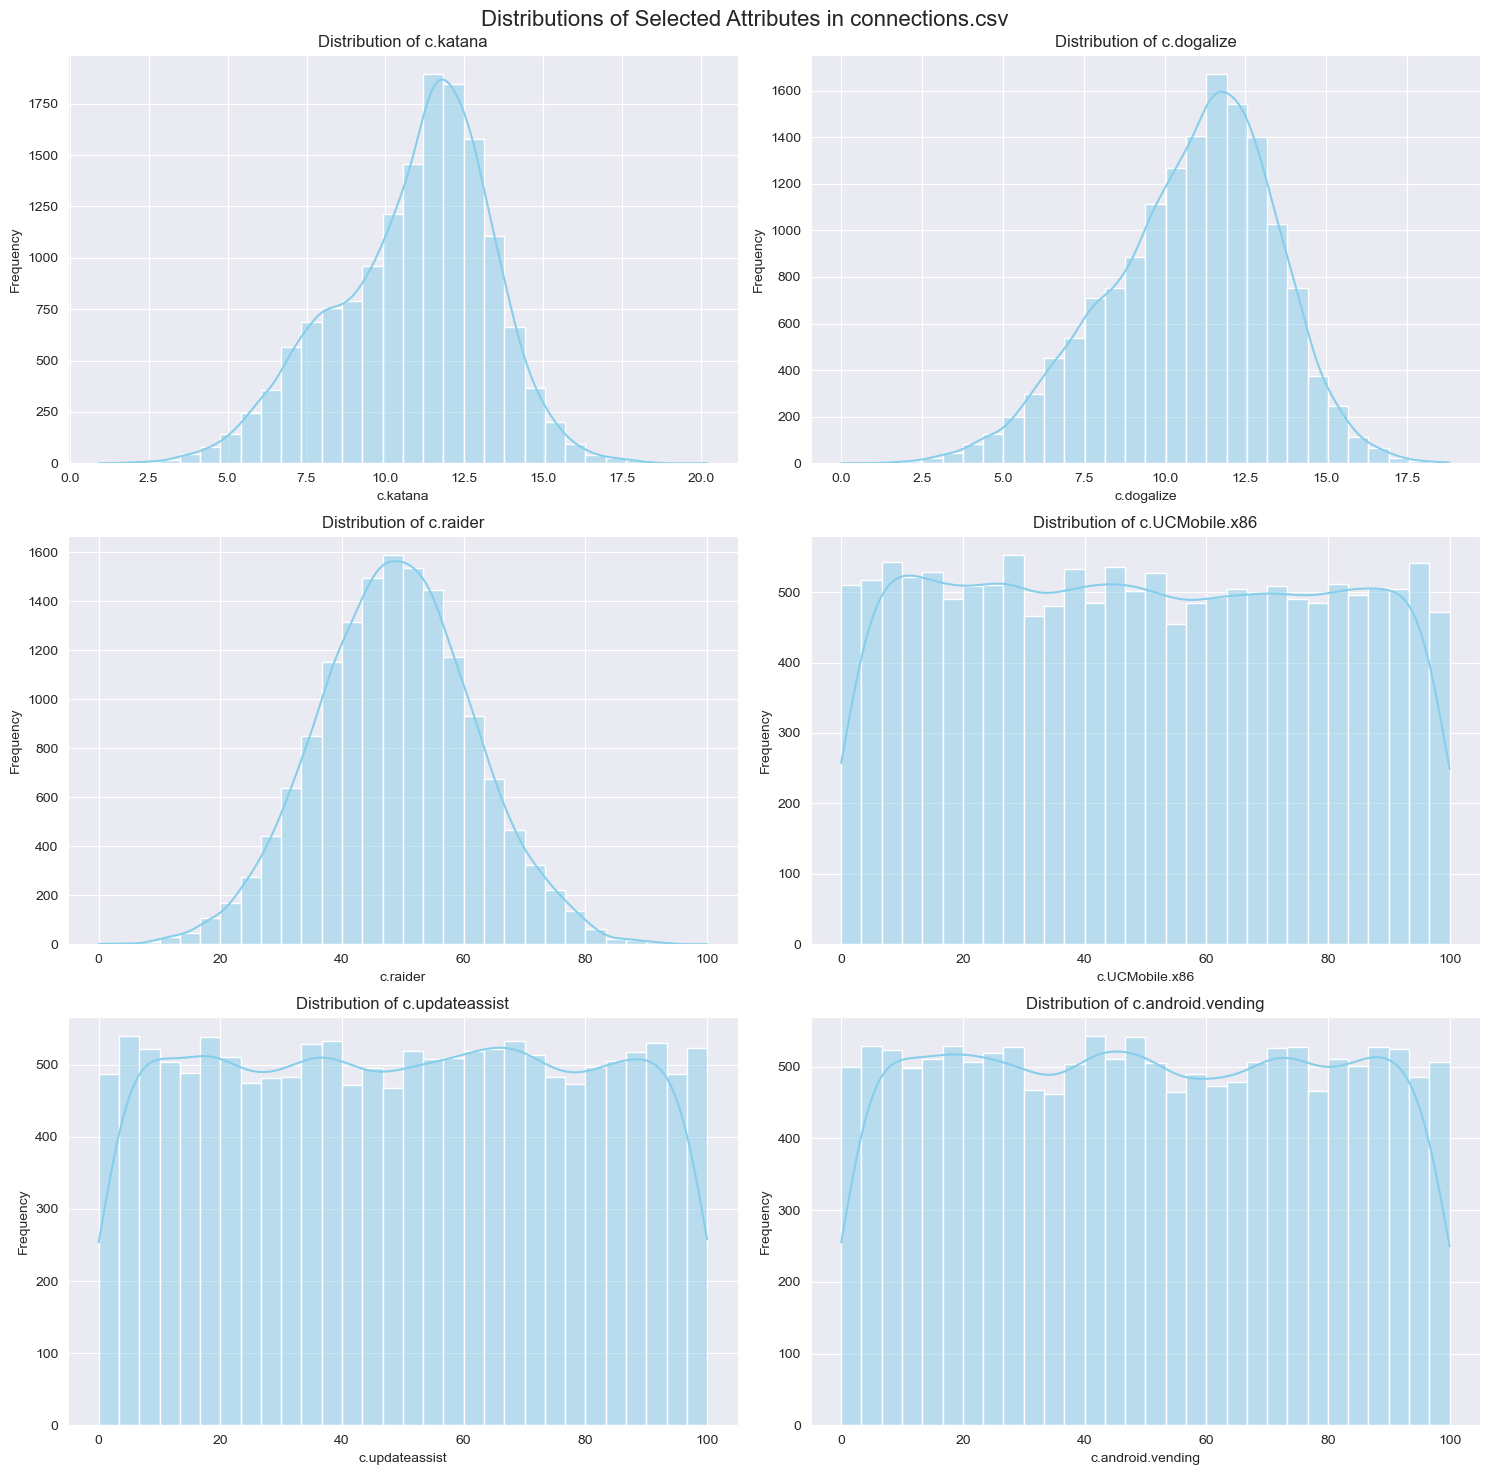

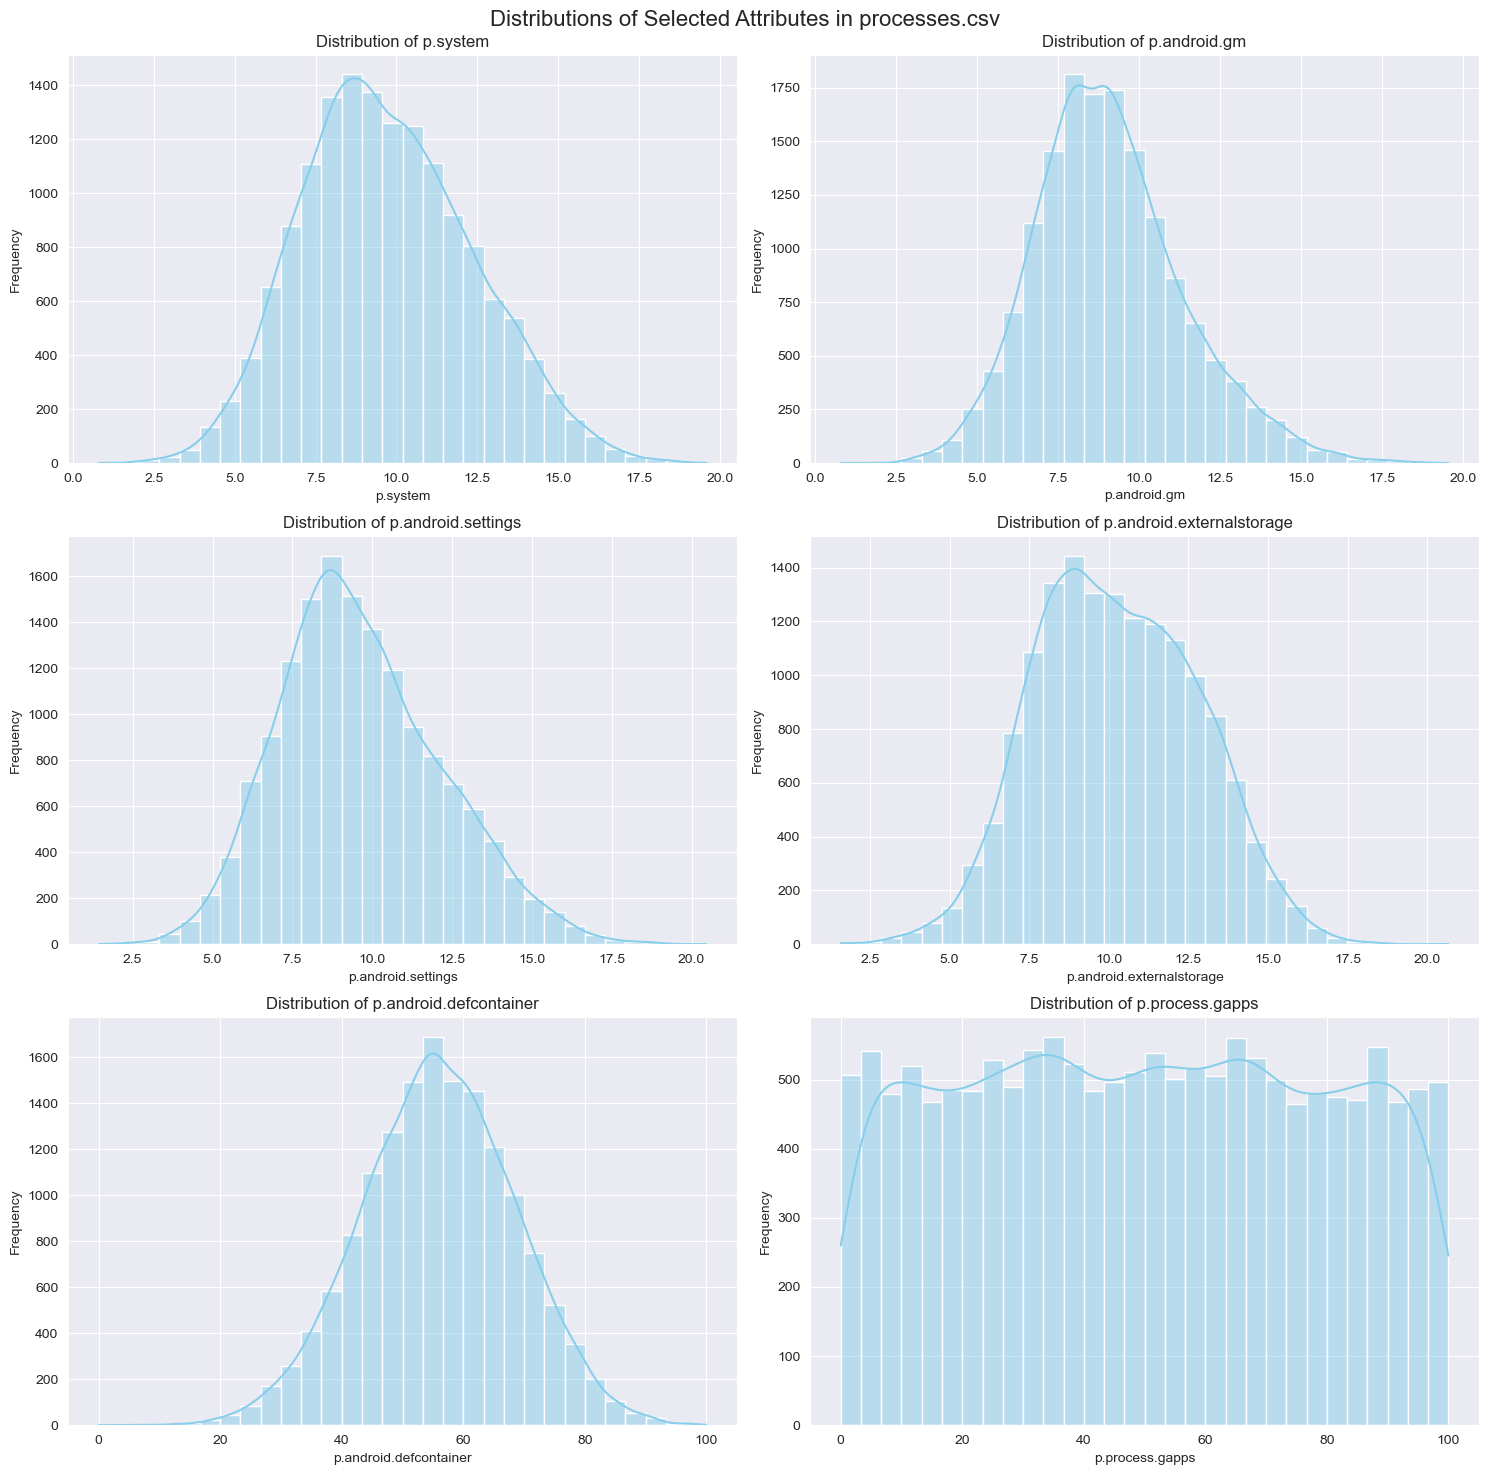

In [15]:
for file, attributes in selected_attributes.items():
    if not attributes:
        continue  # Skip files with no selected attributes

    df = dataframes[file]

    # Handle missing values by imputing with the median (for numerical attributes)
    df[attributes] = df[attributes].fillna(df[attributes].median())

    # Determine the number of attributes to plot
    num_attrs = len(attributes)
    ncols = 2
    nrows = (num_attrs + ncols - 1) // ncols  # Ceiling division to determine rows

    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()  # Flatten in case of multiple rows

    # Plot each attribute
    for i, attr in enumerate(attributes):
        sns.histplot(df[attr], kde=True, bins=30, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {attr}')
        axes[i].set_xlabel(attr)
        axes[i].set_ylabel('Frequency')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout and add a main title
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.suptitle(f'Distributions of Selected Attributes in {file}', fontsize=16)

    plt.show()

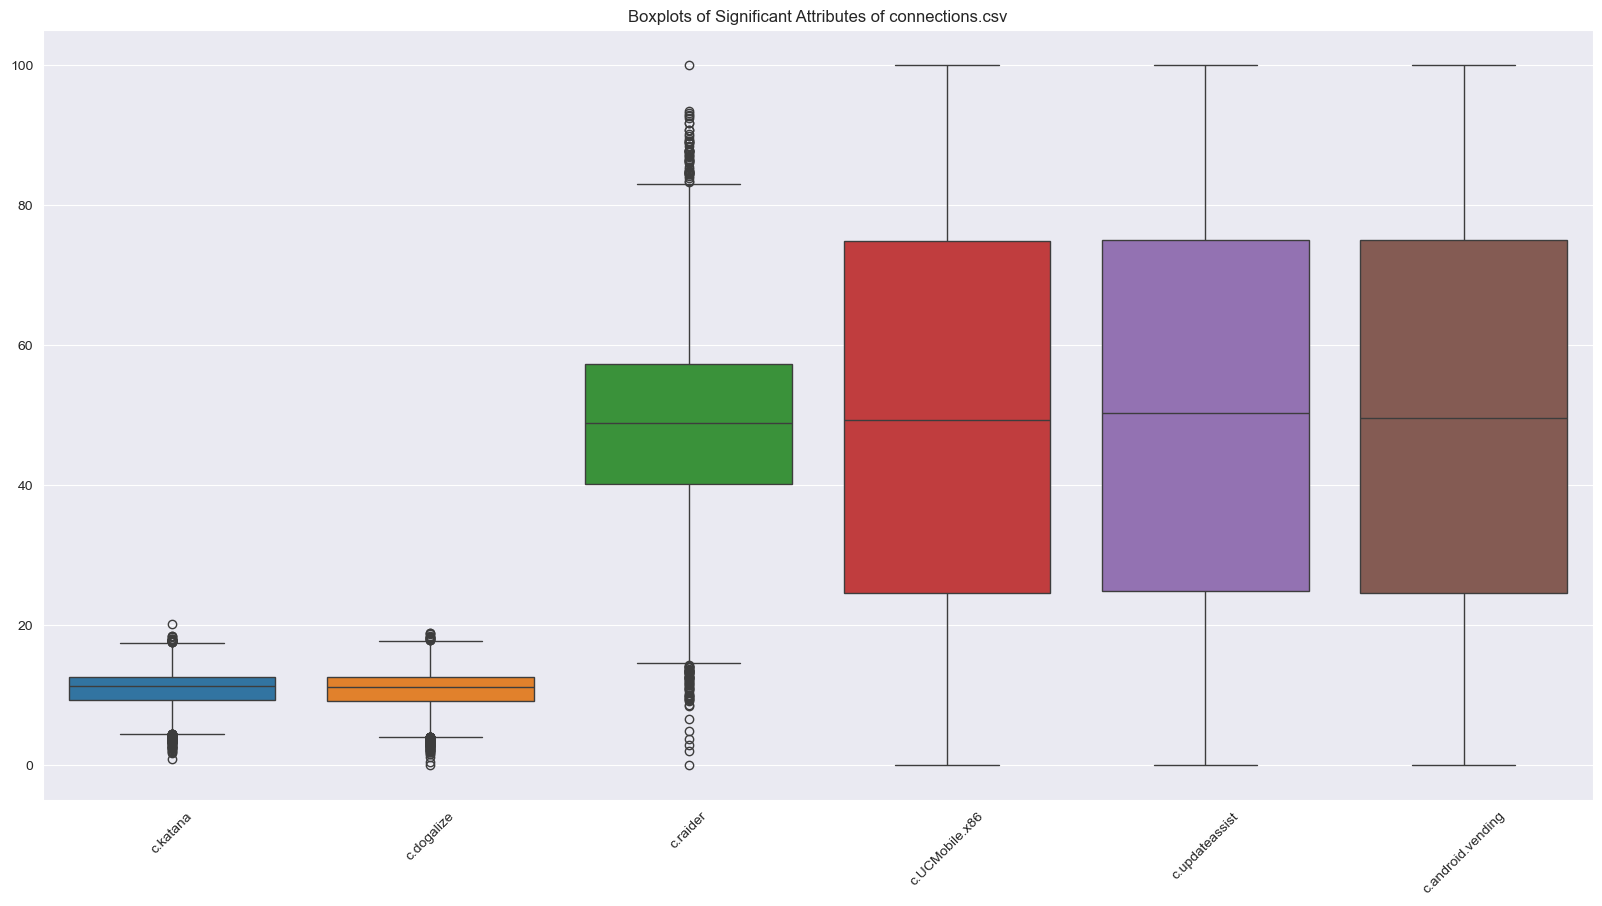

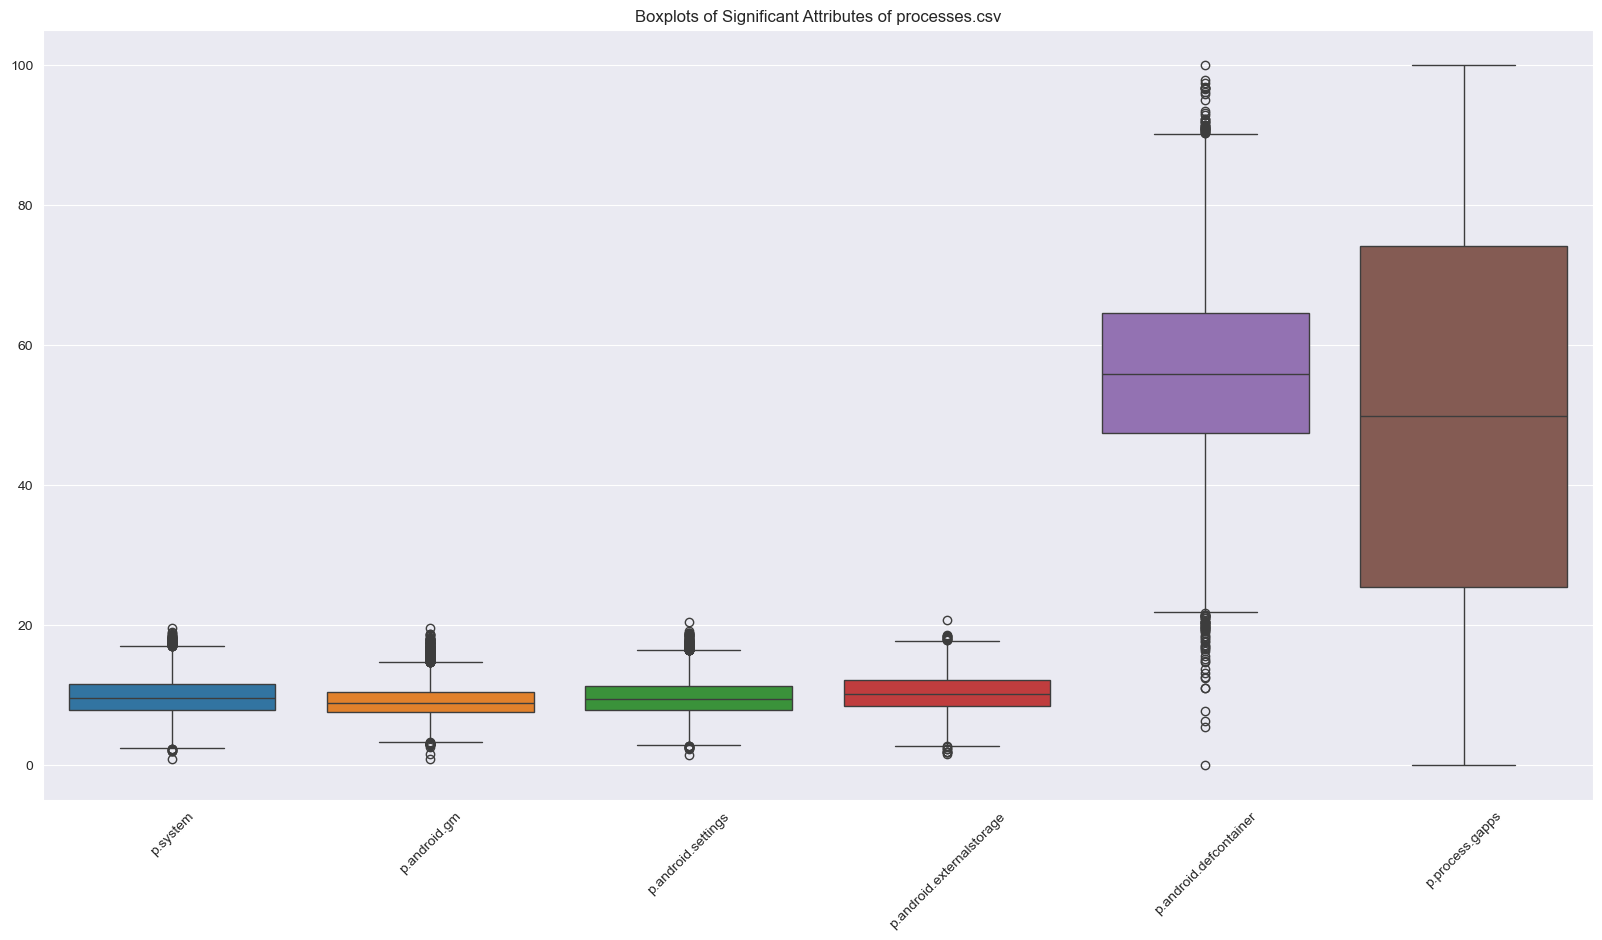

In [33]:
for file, attributes in selected_attributes.items():
    if not attributes:
        continue

    plt.figure(figsize=(20, 10))

    df = dataframes[file]

    sns.boxplot(data=df[attributes])

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.title(f'Boxplots of Significant Attributes of {file}')

    plt.show()

- connections.csv
    - `c.katana` is _right_
    - `c.dogalize` is _right_
    - `c.raider` is _Unimodal_  
    - `c.UCMobile.x86` is _Uniform_
    - `c.updateassist` is _Uniform_
    - `c.android.vending` is _Uniform_
- processes.csv
    - `p.system` is slightly _Skew left_
    - `p.android.gm` is _Skew left_
    - `p.android.settings` is _Skew left_
    - `p.android.externalstorage` is _Skew left_
    - `p.android.defcontainer` is _Unimodal_
    - `p.process.gapps` is _Uniform_

In [29]:
# Get basic descriptive statistics
for file, attributes in selected_attributes.items():
    if not attributes:
        continue

    df = dataframes[file]

    selected_data = df[attributes]
    statistic = selected_data.describe()
    print(f"\n> Structure of {file}:")
    print(statistic)


> Structure of connections.csv:
           c.katana    c.dogalize      c.raider  c.UCMobile.x86  \
count  15155.000000  15155.000000  15155.000000    15155.000000   
mean      10.890645     10.819798     48.827169       49.647858   
std        2.441066      2.566641     12.872042       28.985976   
min        0.918820      0.000000      0.000000        0.000000   
25%        9.328910      9.185185     40.149050       24.635770   
50%       11.287970     11.145600     48.825240       49.267080   
75%       12.600555     12.634880     57.343785       74.827540   
max       20.186330     18.811470    100.000000      100.000000   

       c.updateassist  c.android.vending  
count    15155.000000       15155.000000  
mean        50.031801          49.839305  
std         28.951551          28.960441  
min          0.000000           0.000000  
25%         24.892335          24.518825  
50%         50.346950          49.507350  
75%         74.940920          75.001935  
max        100.0000

#### 1.1.C Pairwise data analysis: identify relationships and dependencies between pairs of attributes.

- _|0.00 - 0.10|: Negligible correlation_
- _|0.10 - 0.30|: Weak correlation_
- _|0.30 - 0.50|: Moderate correlation_
- _|0.50 - 1.00|: Strong correlation_

                   c.katana  c.dogalize  c.raider  c.UCMobile.x86  \
c.katana           1.000000   -0.114995  0.003575       -0.008591   
c.dogalize        -0.114995    1.000000 -0.015554       -0.000964   
c.raider           0.003575   -0.015554  1.000000        0.001386   
c.UCMobile.x86    -0.008591   -0.000964  0.001386        1.000000   
c.updateassist    -0.001747   -0.000623 -0.008478       -0.005471   
c.android.vending  0.010386   -0.009558 -0.007386        0.015443   

                   c.updateassist  c.android.vending  
c.katana                -0.001747           0.010386  
c.dogalize              -0.000623          -0.009558  
c.raider                -0.008478          -0.007386  
c.UCMobile.x86          -0.005471           0.015443  
c.updateassist           1.000000          -0.010828  
c.android.vending       -0.010828           1.000000  


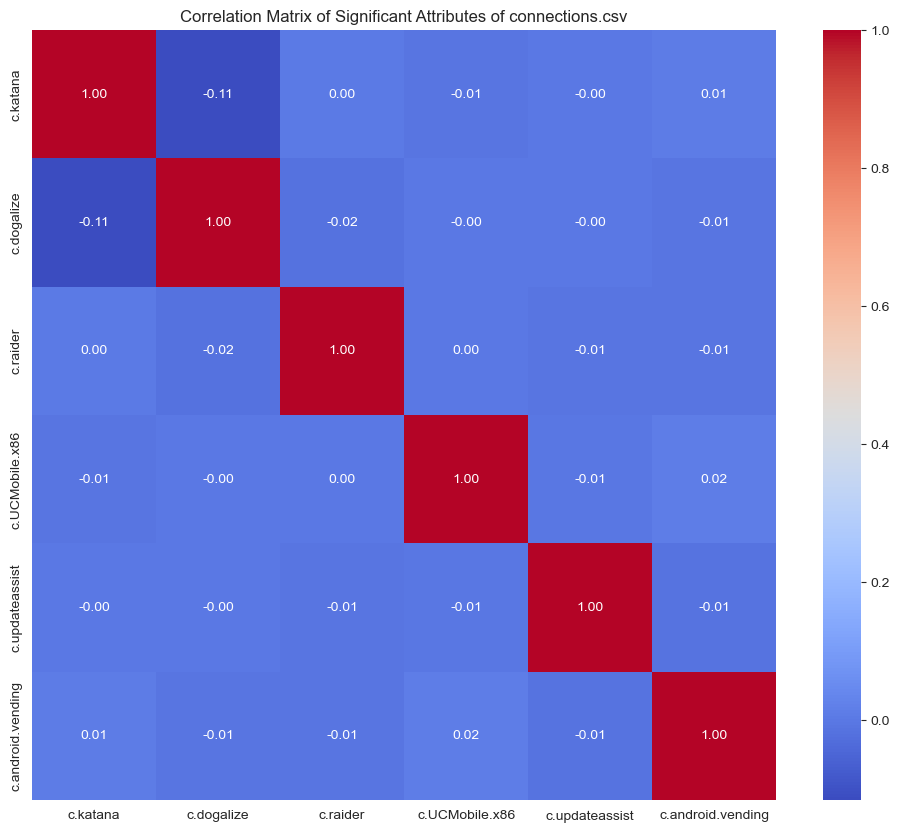

                           p.system  p.android.gm  p.android.settings  \
p.system                   1.000000      0.213018           -0.170750   
p.android.gm               0.213018      1.000000           -0.213485   
p.android.settings        -0.170750     -0.213485            1.000000   
p.android.externalstorage -0.007593     -0.153371           -0.316339   
p.android.defcontainer    -0.004259     -0.000330            0.018559   
p.process.gapps            0.007164      0.014312            0.016626   

                           p.android.externalstorage  p.android.defcontainer  \
p.system                                   -0.007593               -0.004259   
p.android.gm                               -0.153371               -0.000330   
p.android.settings                         -0.316339                0.018559   
p.android.externalstorage                   1.000000               -0.006937   
p.android.defcontainer                     -0.006937                1.000000   
p.proces

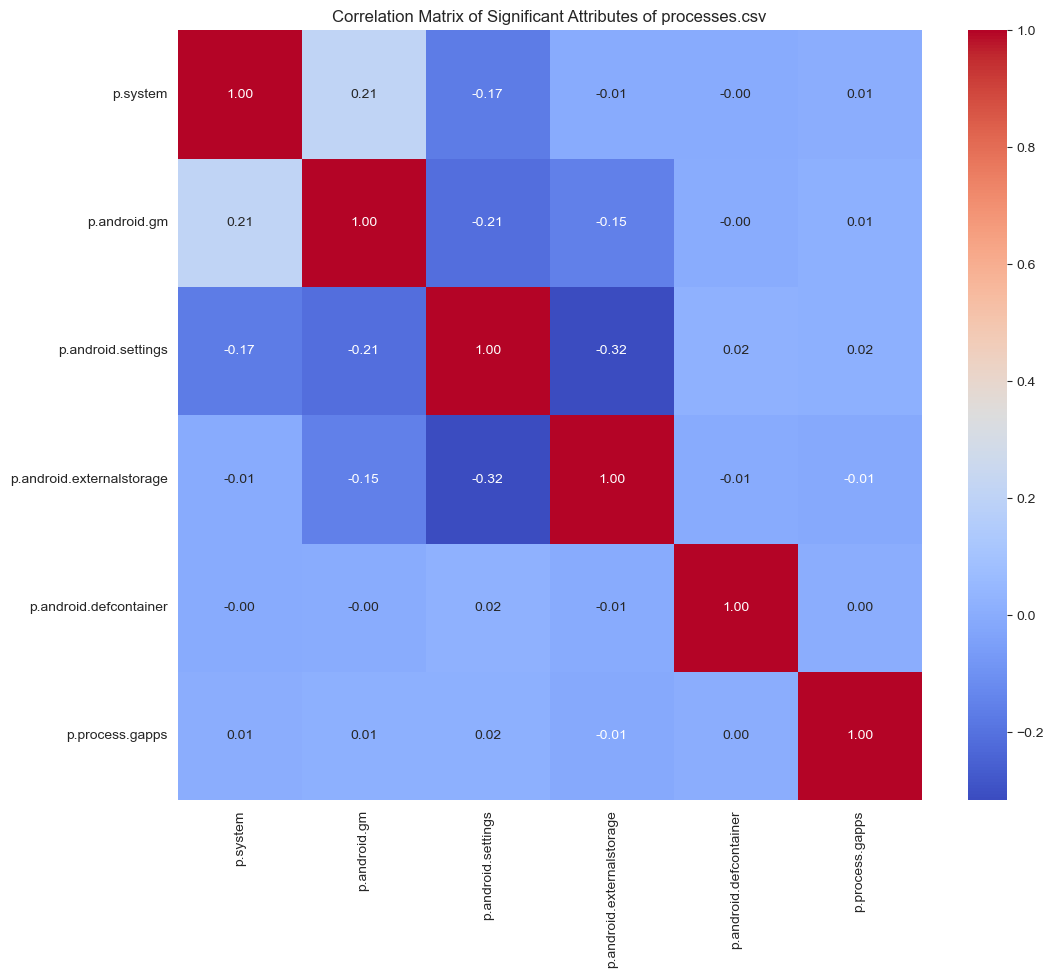

In [37]:
for file, attributes in selected_attributes.items():
    if not attributes:
        continue

    df = dataframes[file]

    # Fill missing values with median 
    df[attributes] = df[attributes].fillna(df[attributes].mean())

    corr_matrix = df[attributes].corr()

    # Display correlation matrix
    print(corr_matrix)

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix of Significant Attributes of ' + file)
    plt.show()

- `processes.csv`
    - `p.android.gm` & `p.system` (**0.213018**) _Weak Positive Correlation_
    - `p.android.gm` & `p.android.settings` (**-0.213485**) _Weak Negative Correlation_
    - `p.android.gm` & `p.android.externalstorage` (**-0.153371**) _Weak Negative Correlation_
    - `p.android.settings` & `p.system` (**0.213018**) _Weak Positive Correlation_
    - `p.android.settings` & `p.externalstorage` (**-0.316339**) _Weak Negative Correlation_

#### 1.1.D Pairwise Analysis Between Target Variable and Other Attributes


Correlation of each attribute with 'mwra' for connections.csv:
imei                 0.009969
mwra                 1.000000
c.katana            -0.312636
c.dogalize           0.554638
c.android.youtube   -0.293872
c.android.chrome    -0.005741
c.android.gm         0.315564
c.raider            -0.006962
c.UCMobile.x86      -0.001065
c.updateassist       0.004948
c.UCMobile.intl      0.015076
c.android.vending   -0.013494
Name: mwra, dtype: float64


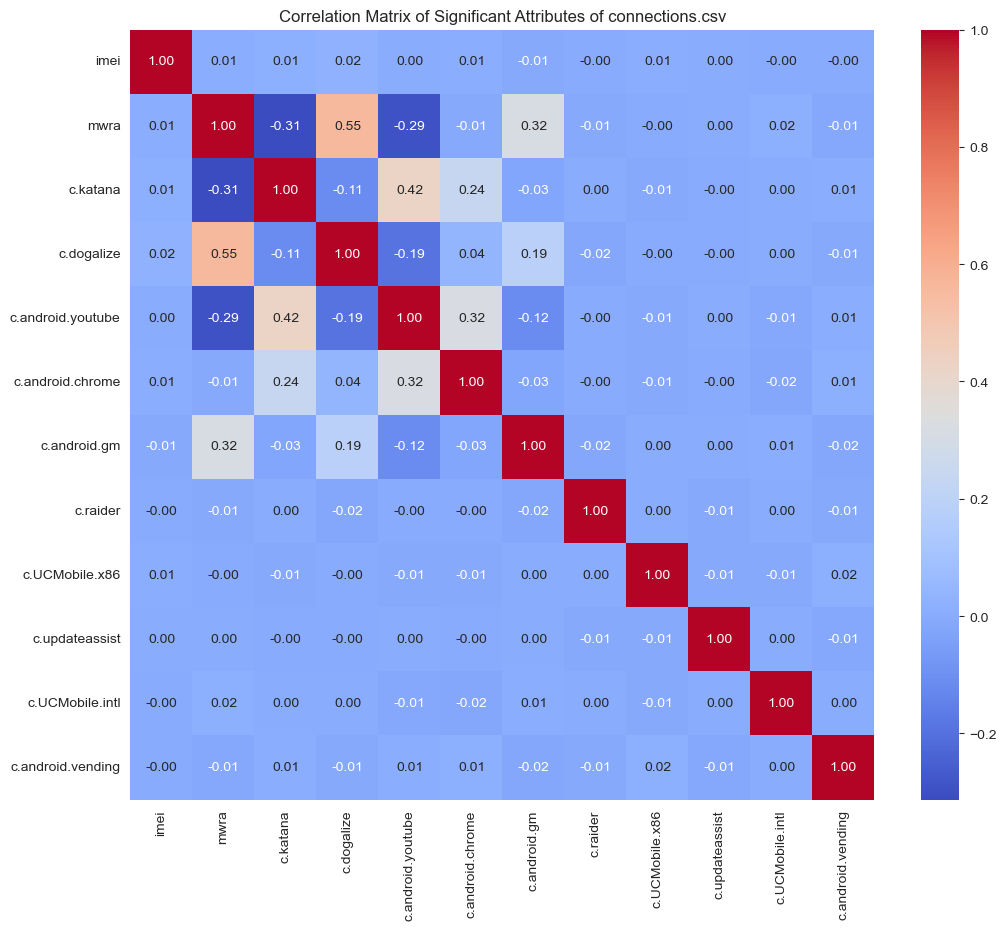


Correlation of each attribute with 'mwra' for processes.csv:
imei                          0.009969
mwra                          1.000000
p.system                     -0.561731
p.android.gm                 -0.326758
p.android.settings            0.280875
p.android.chrome              0.271666
p.android.packageinstaller   -0.007385
p.android.documentsui        -0.567521
p.android.externalstorage     0.007206
p.android.vending            -0.001592
p.olauncher                  -0.075138
p.android.defcontainer        0.014884
p.dogalize                    0.001023
p.browser.provider           -0.020987
p.notifier                   -0.005464
p.gms.persistent              0.004460
p.inputmethod.latin           0.005038
p.katana                      0.006354
p.google                     -0.007335
p.process.gapps              -0.008685
p.android.gms                -0.000437
p.simulator                   0.007522
Name: mwra, dtype: float64


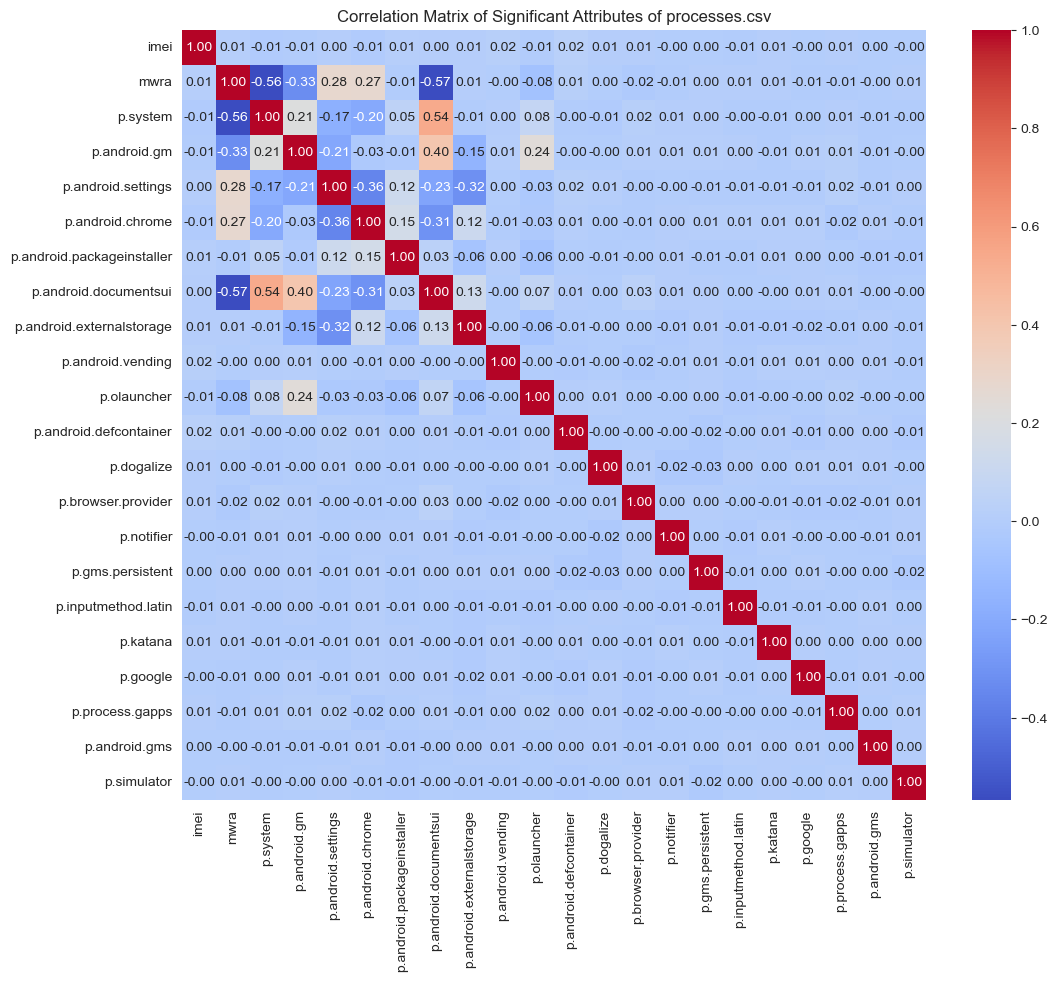

In [53]:
for file, df in dataframes.items():
    if not 'mwra' in df:
        continue

    exclude_columns = ['imei', 'ts']

    cols = [col for col in df if col not in exclude_columns]

    # Select numerical columns for correlation (excluding 'imei' and 'ts')
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    corr_matrix = df[numerical_cols].corr()

    # Extract correlation of all features with 'mwra'
    mwra_corr = corr_matrix['mwra']  # Remove self-correlation

    print(f"\nCorrelation of each attribute with 'mwra' for {file}:")
    print(mwra_corr)

    # Display the correlations
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix of Significant Attributes of ' + file)
    plt.show()

**Correlation with `mwra`**

- `connections.csv`
    -  `c.dogalize` (**0.554638**) _Strong Positive Correlation_
        - It is a significant predictor of malware-related activity.
    - `c.android.gm` (**0.315564**) _Moderate Positive Correlation_
    - `c.katana` (**-0.312636**) _Moderate Negative Correlation_
        - It may play a role in mitigating malware activity, or that its usage is inversely related to malware occurrences.
    - Other attributes have _Negligible correlation_
- `processes.csv`
    - `p.system` (**-0.561731**) _Strong Negative Correlation_
        - It suggests that processes related to the system may play a crucial role in reducing malware-related activity.  
    - `p.android.documentsui` (**-0.567521**) _Strong Negative Correlation_
        - Increased activity or presence of `p.android.documentsui` processes are associated with lower malware activity.
    - `p.android.gm` (**-0.326758**) _Moderate Negative Correlation_
    - `p.android.settings` (**0.280875**) _Moderate Positive Correlation_
    - `p.android.chrome` (**0.271666**) _Moderate Positive Correlation_
    - Other attributes have _Negligible correlation_

#### 1.1.E Initial thinking to address the project brief

> Are any attributes interdependent?

There are several attributes in the data (among the significant ones) that are weakly related to each other (`p.system`, `p.android.gm`, etc.), as well as attributes that are closely related to the predicted variable (`c.dogalize`, `c.android.gm`, `p.system`, `p.android.documentsui`, etc.).

> Which attributes does the predicted variable depend on? 

`c.dogalize`, `c.android.gm` and `c.katana` in **`connections.csv`** <br/>
and <br/>
`p.system`, `p.android.documentsui`, `p.android.gm`, `p.android.settings` and `p.android.chrome` in **`processes.csv`**

> Whether records from multiple files need to be combined?

Every dataframe has its own `imei` column, so we have a possibility to merge them into one dataframe based on that value. But as we already said, data about location and personal information will not be relevant to malware activity. 

_We can assume that devices from some stores come already with virus, but for ML the name of store is relevant_

So the only available option here is merge two dataframes (`connections.csv` and `processes.csv`) together by `imei` value:

In [83]:
# Check uniqueness in connections
connections_df = dataframes['connections.csv']
connections_duplicates = connections_df.duplicated(keep=False)
print(f"Sum of duplicates in connections.csv: {connections_duplicates.sum()}")

# Check uniqueness in processes
processes_df = dataframes['processes.csv']
processes_duplicates = processes_df.duplicated(keep=False)
print(f"Sum of duplicates in processes.csv: {processes_duplicates.sum()}")


Sum of duplicates in connections.csv: 360
Sum of duplicates in processes.csv: 360


In [88]:
# Drop duplicates for connections
connections_df = connections_df.drop_duplicates(keep='first')
print(f"> connections.csv:")
print(connections_df.info())

# Drop duplicates for processes
processes_df = processes_df.drop_duplicates(keep='first')
print(f"\n> processes.csv:")
print(processes_df.info())

> connections.csv:
<class 'pandas.core.frame.DataFrame'>
Index: 14975 entries, 0 to 14974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ts                 14975 non-null  datetime64[ns]
 1   imei               14975 non-null  int64         
 2   mwra               14975 non-null  float64       
 3   c.katana           14975 non-null  float64       
 4   c.dogalize         14975 non-null  float64       
 5   c.android.youtube  14975 non-null  float64       
 6   c.android.chrome   14975 non-null  float64       
 7   c.android.gm       14975 non-null  float64       
 8   c.raider           14975 non-null  float64       
 9   c.UCMobile.x86     14975 non-null  float64       
 10  c.updateassist     14975 non-null  float64       
 11  c.UCMobile.intl    14975 non-null  float64       
 12  c.android.vending  14975 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
mem

In [91]:
# Identify overlapping columns
overlap_cols = set(connections_df.columns).intersection(set(processes_df.columns))
print(overlap_cols)

{'imei', 'mwra', 'ts'}


In [106]:
# Merging to one dataframe based on `imei` and `ts` with adding suffix 
merged_df = pd.merge(
    connections_df,
    processes_df,
    on=['imei', 'ts'],
    how='inner',
    suffixes=('_conn', '_proc')
)

In [97]:
 # Check if mwra values are equal (if not, there is a mismatch in merging)
identical = merged_df['mwra_conn'].equals(merged_df['mwra_proc'])
identical

True

In [107]:
# Duplicates in final dataFrame
merged_df.duplicated(keep=False).sum()

0

Based on next values, the merge has been made successful.


### 1.2 Problem identification, integration and data cleansing

#### 1.2.A Identify and initially solve problems in the data e.g.: inappropriate data structure, duplicate records (rows, columns), inconsistent formats, missing values, skewed values. There may be other problems in the data not listed here.